# My goal is to predict the weekly sales of that department


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
%cd Data/

C:\Users\Anas\Walmart Sales\Data


In [3]:
features = pd.read_csv('features.csv')
data = pd.read_csv("train.csv")
Stores = pd.read_csv("stores.csv")

In [4]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
features.dtypes 

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [7]:
data.shape

(421570, 5)

In [8]:
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [9]:
len(data['Dept'].unique())

81

In [10]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0  

In [11]:
split_date(data)

In [12]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,WeekOfYear
0,1,1,2010-02-05,24924.50,False,2010,2,5,5.0
1,1,1,2010-02-12,46039.49,True,2010,2,12,6.0
2,1,1,2010-02-19,41595.55,False,2010,2,19,7.0
3,1,1,2010-02-26,19403.54,False,2010,2,26,8.0
4,1,1,2010-03-05,21827.90,False,2010,3,5,9.0
...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,28,39.0
421566,45,98,2012-10-05,628.10,False,2012,10,5,40.0
421567,45,98,2012-10-12,1061.02,False,2012,10,12,41.0
421568,45,98,2012-10-19,760.01,False,2012,10,19,42.0


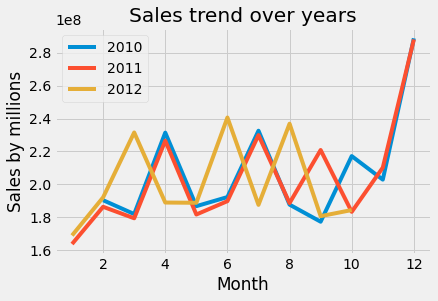

In [13]:
Sales_by_year = data.groupby(by=['Year', 'Month'])['Weekly_Sales'].sum()


for i in Sales_by_year.index.get_level_values(0).unique():
    plt.plot(Sales_by_year[i] )
    plt.tight_layout()
    
plt.legend(Sales_by_year.index.get_level_values(0).unique())
plt.title("Sales trend over years")
plt.xlabel('Month')
plt.ylabel('Sales by millions')
plt.show()

In [14]:
# create a new DataFrame with the weeks as rows, departments as columns, and sales as values
sales_by_week_dept_store = data.pivot_table(index='Date', columns=['Dept', 'Store'], values='Weekly_Sales')

sales_by_week_dept_store.head()

Dept              1                                                     \
Store             1         2         3         4         5         6    
Date                                                                     
2010-02-05  24924.50  35034.06   6453.58  38724.42   9323.89  25619.00   
2010-02-12  46039.49  60483.70  12748.72  69872.44  16861.10  43749.81   
2010-02-19  41595.55  58221.52   8918.31  49937.09  11417.67  34750.82   
2010-02-26  19403.54  25962.32   4992.00  30107.54   7168.41  19896.08   
2010-03-05  21827.90  27372.05   5172.73  31580.69   8344.13  22839.36   

Dept                                                ...  99                  \
Store             7         8         9         10  ...  33  34  36  37  38   
Date                                                ...                       
2010-02-05   8970.97  16181.89  12861.40  40212.84  ... NaN NaN NaN NaN NaN   
2010-02-12  14026.65  34262.09  20273.94  67699.32  ... NaN NaN NaN NaN NaN   
2010-02-19  12477.79  22319.25  14819.97  49748.33  ... NaN NaN NaN NaN NaN   
2010-02-26   8602.73  11722.71  10530.98  33601.22  ... NaN NaN NaN NaN NaN   
2010-03-05   9541.12  12979.74  10438.47  36572.44  ... NaN NaN NaN NaN NaN   

Dept                                
Store         39  40  41  43    44  
Date                                
2010-02-05   NaN NaN NaN NaN   NaN  
2010-02-12   NaN NaN NaN NaN   NaN  
2010-02-19   NaN NaN NaN NaN   NaN  
2010-02-26   NaN NaN NaN NaN   NaN  
2010-03-05  0.01 NaN NaN NaN  0.01  

[5 rows x 3331 columns]

In [15]:
Total_sales = sales_by_week_dept_store.sum(axis=0).sort_values(ascending=False)
Total_sales

Dept  Store
92    14       26101497.71
      2        23572153.03
      20       23542625.04
      13       23170876.20
      4        22789210.43
                  ...     
47    45          -1061.04
72    42          -1209.93
47    10          -2329.00
      1           -2562.00
      35          -3567.18
Length: 3331, dtype: float64

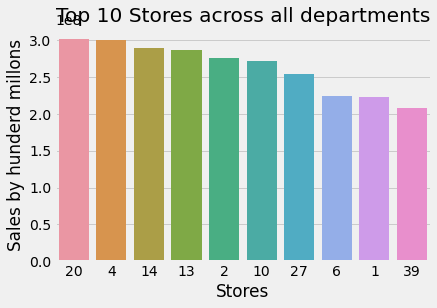

In [16]:
#top stores in sales over time 
Stores_sales = Total_sales.groupby('Store').sum()
Top_stores = Stores_sales.sort_values(ascending=False)[:10]
sns.barplot(x= Top_stores.index ,y = Top_stores.values , order = Top_stores.index )
plt.title("Top 10 Stores across all departments")
plt.xlabel("Stores")
plt.ylabel('Sales by hunderd millons')
plt.show()

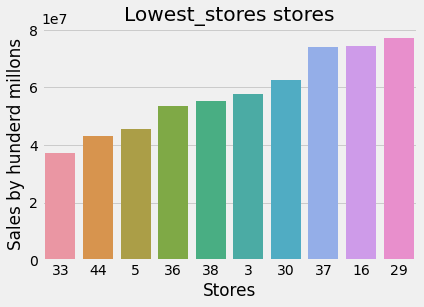

In [17]:
#Lowest_stores store across them 
Lowest_stores  = Stores_sales.sort_values(ascending= True)[:10]
sns.barplot(x= Lowest_stores.index ,y = Lowest_stores.values , order = Lowest_stores.index )
plt.title("Lowest_stores stores")
plt.xlabel("Stores")
plt.ylabel('Sales by hunderd millons')
plt.show()

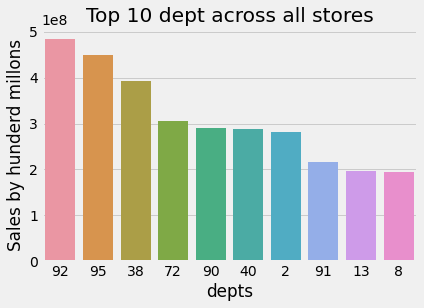

In [18]:
#top departments across all stores 
Dept_sales =  Total_sales.groupby('Dept').sum()
Top_depts = Dept_sales.sort_values(ascending=False)[:10]

sns.barplot(x= Top_depts.index ,y = Top_depts.values , order = Top_depts.index )
plt.title("Top 10 dept across all stores")
plt.xlabel("depts")
plt.ylabel('Sales by hunderd millons')
plt.show()

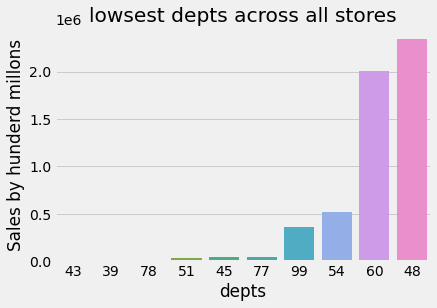

In [19]:
#lowest departments across all stores 
Lowest_dept = Dept_sales.loc[Dept_sales > 0].sort_values(ascending=True)[:10]
sns.barplot(x= Lowest_dept.index ,y = Lowest_dept.values , order = Lowest_dept.index )
plt.title("lowsest depts across all stores")
plt.xlabel("depts")
plt.ylabel('Sales by hunderd millons')
plt.show()

In [20]:
def plot_departments_trend(index,data , ax):
    
    for i in index:
        ax.plot(data[i]  ,label = i)
        
        
    ax.legend(index)
    ax.set_title(f"Sales for {len(index)} departments ")
    ax.set_xlabel("Week")
    ax.set_ylabel("Sales")
    plt.tight_layout()
    return ax

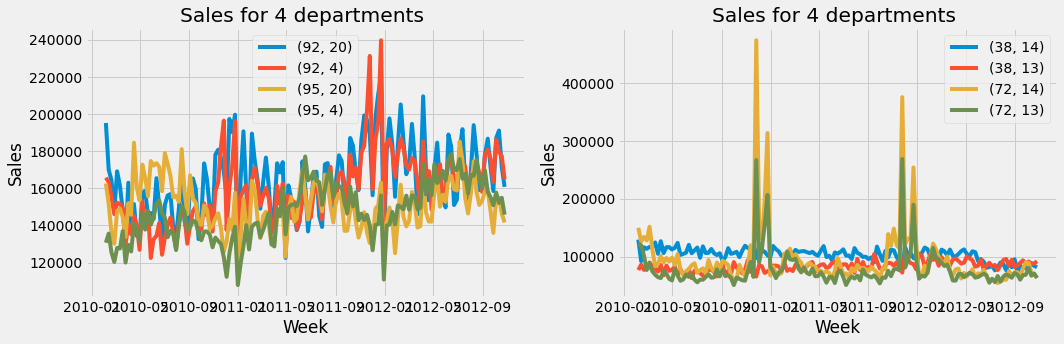

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (15,5))

ax1= ax[0]
plot_departments_trend( Total_sales.loc[Top_depts.index[:2]  ,Top_stores.index[:2]].index , sales_by_week_dept_store , ax1)
ax2 = ax[1]
plot_departments_trend( Total_sales.loc[Top_depts.index[2:4],Top_stores.index[2:4]].index , sales_by_week_dept_store , ax2)


plt.show()

In [22]:
log_index=tuple(Total_sales.loc[Top_depts.index[:1]  ,Top_stores.index[:2]].index [:2])
log_index

((92, 20), (92, 4))

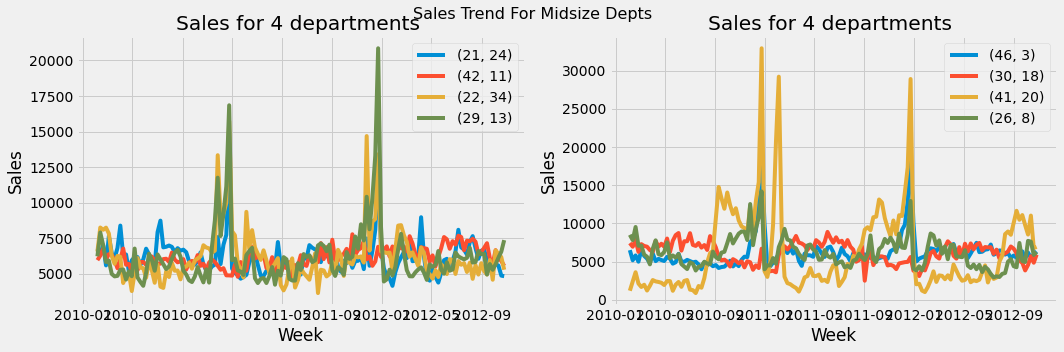

In [23]:
index = int(np.ceil(len(Total_sales)/2)) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (15,5))

ax1= ax[0]
plot_departments_trend( Total_sales[index :  index+4].index , sales_by_week_dept_store , ax1)
ax2 = ax[1]
plot_departments_trend( Total_sales[index-4 :  index].index , sales_by_week_dept_store , ax2)

fig.suptitle("Sales Trend For Midsize Depts" , fontsize = 16)
plt.show()
log_index  =   log_index + tuple(Total_sales[index :  index+2].index)

In [24]:
index1= Total_sales[Total_sales < 10000].index
log_index = log_index + tuple(index1[:2])

In [25]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [26]:
features['Date'] = pd.to_datetime(features['Date'])

!pip install fastparquet

In [27]:
merged_data = pd.merge(data , features ,on = ['Store' , 'Date'] , how ='inner')

merged_data = pd.merge(merged_data , Stores , on='Store' , how = 'inner')

merged_data.fillna({"MarkDown1" : 0 , 
                    "MarkDown2" : 0 ,
                    "MarkDown3" : 0,
                    "MarkDown4" : 0 ,
                    "MarkDown5" : 0}, inplace= True)


merged_data = merged_data.rename(columns={'IsHoliday_x': 'IsHoliday'})
merged_data.drop('IsHoliday_y' , inplace= True , axis= 1)
merged_data['IsHoliday'] = merged_data['IsHoliday'].astype('int8')

merged_data['Type'] = merged_data['Type'].astype('category')

split_date(merged_data)
merged_data.to_parquet('Merged.parquet' , engine='fastparquet')

In [28]:
merged_data = pd.read_parquet('Merged.parquet')

In [29]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,WeekOfYear,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,2010,2,5,5.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,0,2010,2,5,5.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,0,2010,2,5,5.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,0,2010,2,5,5.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,0,2010,2,5,5.0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,2012,10,26,43.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,0,2012,10,26,43.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,0,2012,10,26,43.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,0,2012,10,26,43.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [30]:
merged_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 int8
Year                     int32
Month                    int32
Day                      int32
WeekOfYear             float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                  category
Size                     int64
dtype: object

In [31]:
merged_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Year            0
Month           0
Day             0
WeekOfYear      0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [32]:
merged_data[['Store' , 'Size' , 'Type']].sample(5)

,Store,Size,Type
209260,22,119557,B
138452,15,123737,B
260414,27,204184,A
141231,15,123737,B
115864,12,112238,B


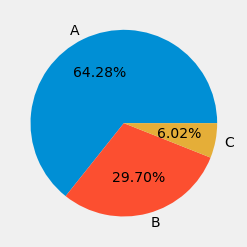

In [33]:
def format_pct(pct):
    return '{:.2f}%'.format(pct)

sales_by_type= merged_data.groupby(by='Type')['Weekly_Sales'].sum()
plt.pie(x=sales_by_type , labels=sales_by_type.index , autopct=format_pct)
plt.show()

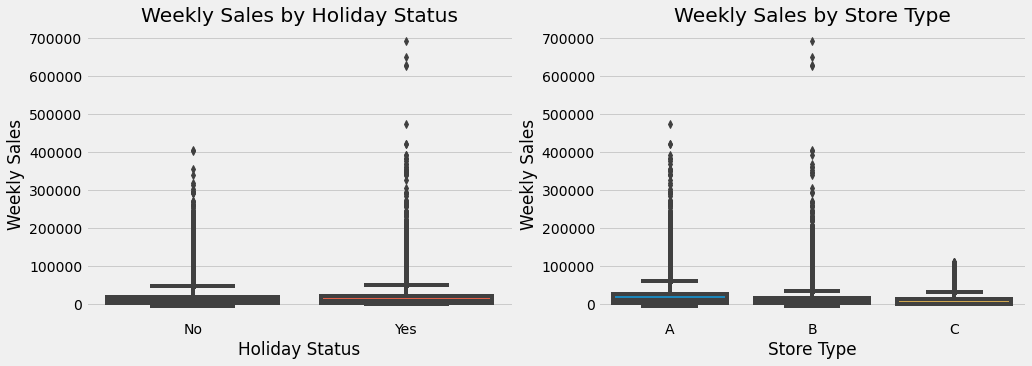

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (15,5))


sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=merged_data , ax=axs[0] )

axs[0].set_xlabel('Holiday Status')
axs[0].set_ylabel('Weekly Sales')
axs[0].set_xticks([1, 0], ['Yes' , 'No'])
axs[0].set_title('Weekly Sales by Holiday Status')


sns.boxplot(x='Type' , y='Weekly_Sales' ,data=merged_data , ax=axs[1])
axs[1].set_xlabel('Store Type')
axs[1].set_ylabel('Weekly Sales')
axs[1].set_title('Weekly Sales by Store Type')


plt.show()

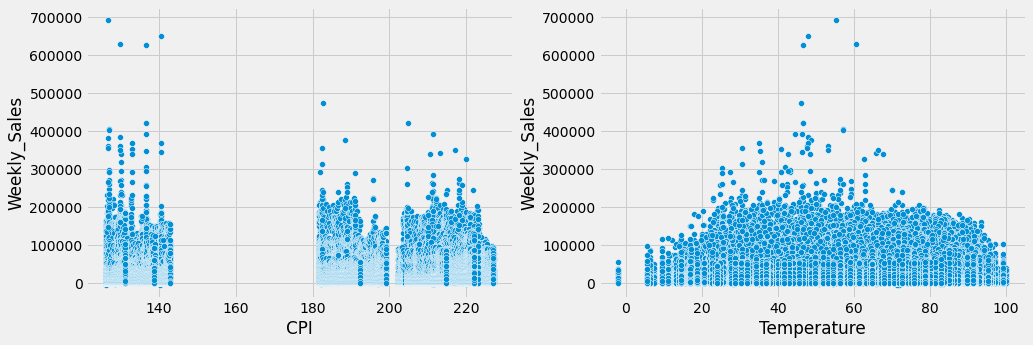

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (15,5))
sns.scatterplot(x='Temperature' , y='Weekly_Sales', data=merged_data , ax=axs[1])
sns.scatterplot(x='CPI' , y='Weekly_Sales', data=merged_data , ax=axs[0])
plt.show()

In [36]:
merged_data[['MarkDown1','MarkDown2' , 'MarkDown3' ]].sample(10)

,MarkDown1,MarkDown2,MarkDown3
205944,5130.81,38.3,0.00
167628,0.00,0.0,0.00
280429,0.00,0.0,0.00
199453,0.00,0.0,0.00
44077,0.00,0.0,0.00
65543,3393.21,0.0,94.93
268440,0.00,0.0,0.00
173360,0.00,0.0,0.00
71301,0.00,0.0,0.00
182403,0.00,0.0,0.00


In [37]:
def autocorrplot(nrows , ncols, size , data ,index , lags , type = plot_acf ):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize= size)
 

    for i , (x , j) in enumerate(index):
        if  i < nrows * ncols :
            row =  i // ncols
            col = i % ncols 
            type(data[x, j] , ax[row , col], lags=lags)

    plt.tight_layout()
        
    return plt.show()


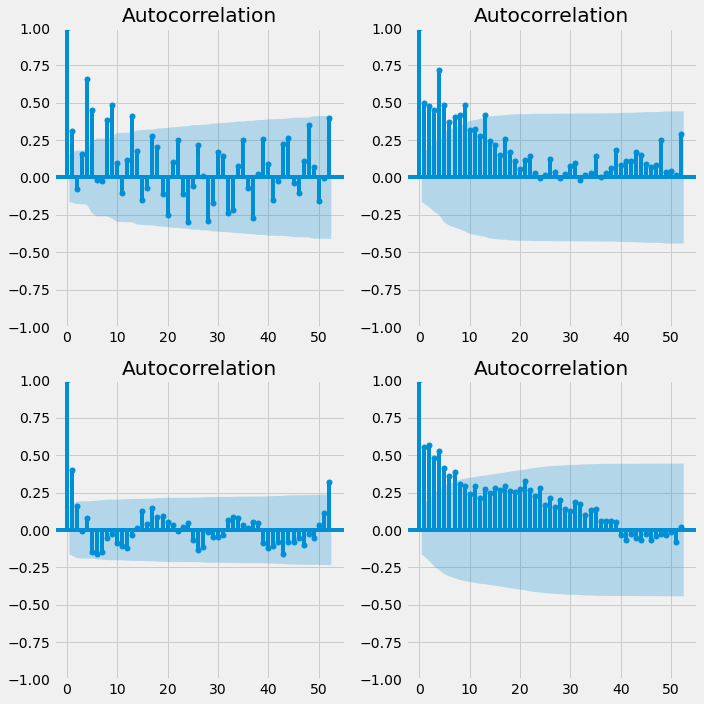

In [40]:
autocorrplot(2,2,(10 ,10),sales_by_week_dept_store , log_index , 52)

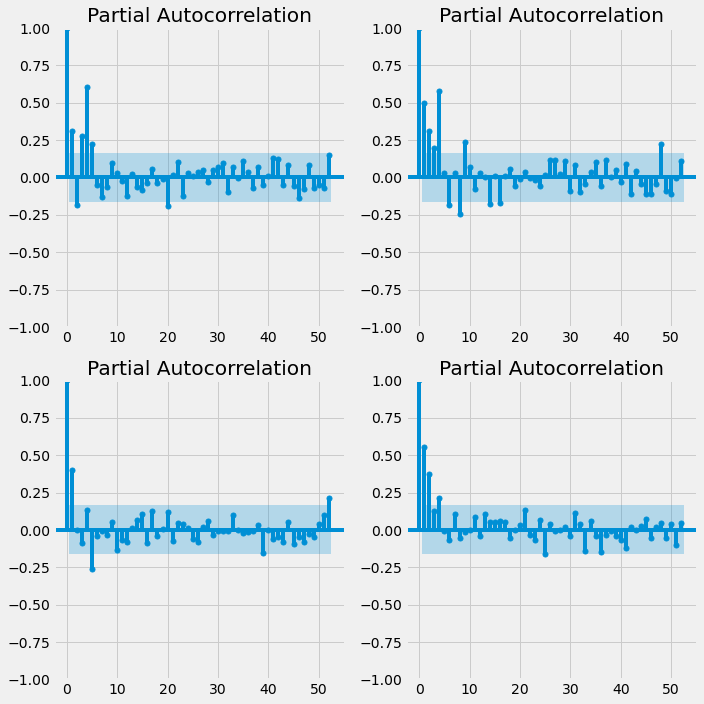

In [42]:
autocorrplot(2,2,(10 ,10),sales_by_week_dept_store , log_index , 52 , type=plot_pacf)